In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [0]:
#Written in Google Collab: add drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#Load in the data...
data_tensor = np.load('/content/drive/Shared drives/DSCI400_Revamp/data_tensor_1D.npy')
label_array = np.load('/content/drive/Shared drives/DSCI400_Revamp/label_array_1D.npy')

print(data_tensor.shape)
print(label_array.shape)


(16224, 6080, 1)
(16224,)


In [0]:
#Separate into test/train
X_train, X_test, y_train, y_test = train_test_split(data_tensor, label_array, test_size=0.33)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(10870, 6080, 1)
(10870,)
(5354, 6080, 1)
(5354,)


In [0]:
#Make a Keras Model and see what happens...

model = tf.keras.Sequential()

model.add(tf.keras.layers.Convolution1D(128, kernel_size=100, activation='relu', input_shape=(6080,1)))
model.add(tf.keras.layers.Convolution1D(64, kernel_size=10, activation='relu'))
# model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Convolution1D(64, kernel_size=100, activation='tanh'))
model.add(tf.keras.layers.Convolution1D(32, kernel_size=10, activation='tanh'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
# model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

sgd = tf.keras.optimizers.SGD(lr = 0.01, decay = 1e-4, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

model2 = tf.keras.Sequential()

model2.add(tf.keras.layers.Convolution1D(128, kernel_size=100, activation='tanh', input_shape=(6080,1)))
model2.add(tf.keras.layers.Convolution1D(64, kernel_size=10, activation='tanh'))
model2.add(tf.keras.layers.Dropout(0.25))
#model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.GlobalMaxPooling1D())
model2.add(tf.keras.layers.Dense(50, activation="relu"))
model2.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_6 (Conv1D)            (None, 5981, 128)         12928     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 5972, 64)          81984     
_________________________________________________________________
dropout_2 (Dropout)          (None, 5972, 64)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 5873, 64)          409664    
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 5864, 32)          20512     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [0]:
print("Training")
model.fit(X_train, y_train, epochs=15, batch_size=16, verbose=1)
print()
print("Test")
test_loss, test_acc = model.evaluate(X_test,y_test)

Training
Epoch 1/15
680/680 [==============================] - 40s 59ms/step - loss: 4.6822e-08 - accuracy: 0.6052
Epoch 2/15
680/680 [==============================] - 41s 60ms/step - loss: 4.6840e-08 - accuracy: 0.6050
Epoch 3/15
680/680 [==============================] - 41s 61ms/step - loss: 4.6822e-08 - accuracy: 0.6054
Epoch 4/15
680/680 [==============================] - 41s 60ms/step - loss: 4.6840e-08 - accuracy: 0.6064
Epoch 5/15
680/680 [==============================] - 41s 61ms/step - loss: 4.6804e-08 - accuracy: 0.6063
Epoch 6/15
680/680 [==============================] - 41s 60ms/step - loss: 4.6840e-08 - accuracy: 0.6053
Epoch 7/15
680/680 [==============================] - 41s 60ms/step - loss: 4.6840e-08 - accuracy: 0.6056
Epoch 8/15
680/680 [==============================] - 41s 60ms/step - loss: 4.6804e-08 - accuracy: 0.6056
Epoch 9/15
680/680 [==============================] - 41s 60ms/step - loss: 4.6804e-08 - accuracy: 0.6048
Epoch 10/15
680/680 [================

In [0]:
print("Training 2")
model2.fit(X_train, y_train, epochs=15, batch_size=16, verbose=1)
print()
print("Test 2")
test_loss2, test_acc2 = model.evaluate(X_test,y_test)

Training 2
Epoch 1/15
680/680 [==============================] - 16s 24ms/step - loss: 4.6840e-08 - accuracy: 0.3929
Epoch 2/15
680/680 [==============================] - 16s 24ms/step - loss: 4.6822e-08 - accuracy: 0.3930
Epoch 3/15
680/680 [==============================] - 16s 24ms/step - loss: 4.6840e-08 - accuracy: 0.3929
Epoch 4/15
680/680 [==============================] - 16s 23ms/step - loss: 4.6804e-08 - accuracy: 0.3929
Epoch 5/15
680/680 [==============================] - 16s 23ms/step - loss: 4.6840e-08 - accuracy: 0.3929
Epoch 6/15
680/680 [==============================] - 16s 24ms/step - loss: 4.6840e-08 - accuracy: 0.3930
Epoch 7/15
680/680 [==============================] - 16s 24ms/step - loss: 4.6822e-08 - accuracy: 0.3929
Epoch 8/15
680/680 [==============================] - 16s 24ms/step - loss: 4.6804e-08 - accuracy: 0.3929
Epoch 9/15
680/680 [==============================] - 16s 24ms/step - loss: 4.6804e-08 - accuracy: 0.3929
Epoch 10/15
680/680 [==============

(5354,)
0
(5354,)
0


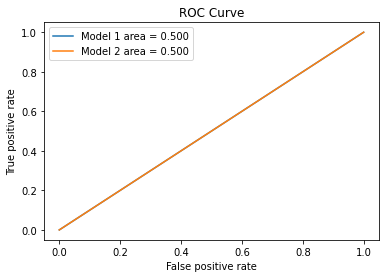

In [0]:
y_pred = model.predict(X_test).astype("int32").ravel()
y_pred2 = model2.predict(X_test).astype("int32").ravel()

print(y_pred.shape)
print(sum(y_pred))

print(y_pred2.shape)
print(sum(y_pred2))

fpr, tpr, threshold = roc_curve(y_test, y_pred)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred2)

auc1 = auc(fpr, tpr)
auc2 = auc(fpr2, tpr2)

plt.plot(fpr, tpr, label = 'Model 1 area = {:.3f}'.format(auc1))
plt.plot(fpr2, tpr2, label = 'Model 2 area = {:.3f}'.format(auc2))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()